In [1]:
import pandas as pd

In [111]:
df_train = pd.read_csv('df_train.csv')

In [112]:
df_train.head(2)

,tweets,label,tweets_flat,tweets_chinese,tweets_cut,tweets_clean,n,f,s,t,...,xc,w,PER,LOC,ORG,TIME,O,n_pos,n_neg,word_count
0,"[{'tweet_content': '请多多注意防护预防感染常戴口罩', 'posting...",0,请多多注意防护预防感染常戴口罩 走在乡间的小路上乡村风景美如画 空运的螃蟹到了快来领取啊 何...,请多多注意防护预防感染常戴口罩 走在乡间的小路上乡村风景美如画 空运的螃蟹到了快来领取啊 何...,请 多多 注意 防护 预防 感染 常 戴口罩 走 在 乡间 的 小路 上 乡村 风景 美...,多多 注意 防护 预防 感染 常 戴口罩 走 乡间 小路 乡村 风景 美如画 空运 螃蟹...,0.195274,0.016331,0.006254,0.005559,...,0.012509,0.000695,0.008339,0.037874,0.004517,0.004864,0.0,0.114663,0.380473,2878
1,"[{'tweet_content': '你敢不敢让我中个小恐龙', 'posting_tim...",0,你敢不敢让我中个小恐龙 周年庆邀你盛装出席 5月1日5月8日参与周年庆活动分享你的周年庆时装...,你敢不敢让我中个小恐龙 周年庆邀你盛装出席 月 日 月 日参与周年庆活动分享你的周年庆时装...,你 敢不敢 让 我 中 个 小 恐龙 周年庆 邀 你 盛装 出席 月 日 月 日 参...,敢不敢 恐龙 周年庆 邀 盛装 出席 参与 周年庆 活动 分享 周年庆 时装 穿 搭...,0.185999,0.012264,0.003577,0.003577,...,0.038835,0.001533,0.003577,0.004088,0.000511,0.020950,0.0,0.077159,0.358712,1957


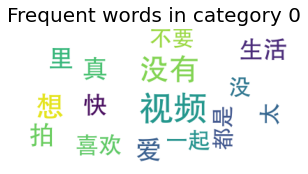

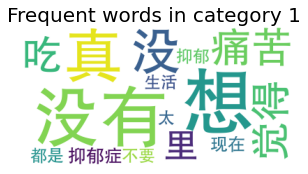

In [120]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
font_path = 'FZHTJW.TTF'

for j in range(2):

    cat = df_train[df_train.label ==j]['tweets_clean'].values
    string = ''
    for i in range(len(cat)):
        try:
            string += cat[i]
        except:
            pass
    wc = WordCloud(font_path = font_path,background_color="white", max_words=15,collocations=False)
#     wc.generate(" ".join(cat))
    wc.generate(string)

    plt.figure(figsize=(5,4))
    plt.axis("off")
    plt.title("Frequent words in category %d" %j, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)

### Sentiment Word Count Analysis

In [121]:
normal = df_train[df_train.label == 0]
depressed = df_train[df_train.label == 1]

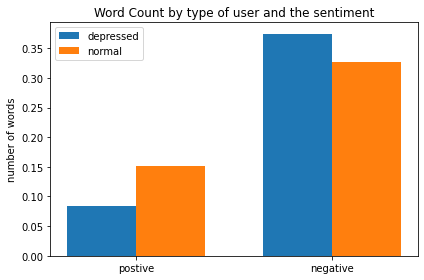

In [122]:
import numpy as np
label = ['postive','negative']
x = np.arange(len(label))  # the label locations
normal_mean= [df_train.groupby(['label']).mean()['n_pos'][0],df_train.groupby(['label']).mean()['n_neg'][0]]
depressed_mean = [df_train.groupby(['label']).mean()['n_pos'][1],df_train.groupby(['label']).mean()['n_neg'][1]]

width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, depressed_mean, width, label='depressed')
rects2 = ax.bar(x + width/2, normal_mean, width, label='normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of words')
ax.set_title('Word Count by type of user and the sentiment')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()

In [123]:
df_train.groupby(['label']).mean()['word_count']

label
0    1960.214924
1    1903.372785
Name: word_count, dtype: float64

### Sentiment Distribution

In [124]:
def dis_plot(data, l):
    fig, ax = plt.subplots()

    plot1 = sns.distplot(data['n_pos'], label = 'postive')
    plot1 = sns.distplot(data['n_neg'], label = 'negative')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Density')
    ax.set_xlabel('Proportion')
    ax.set_title('Sentiment Words Distribution for %s User' %l)
    ax.legend()

    fig.tight_layout()

    plt.show()

/Users/lichendong/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lichendong/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


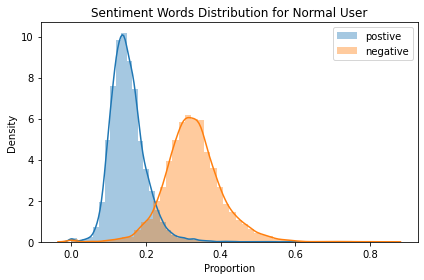

/Users/lichendong/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lichendong/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


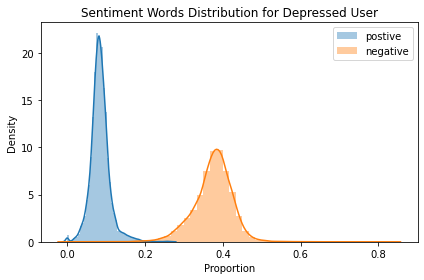

In [125]:
dis_plot(normal,'Normal')
dis_plot(depressed,'Depressed')

In [146]:
len(df_train[df_train['tweets_clean'].str.contains('划破', na=False)])

115

In [157]:
df_train[df_train['tweets_clean'].str.contains('共青团员', na=False)]['label'].value_counts()

0    16
1     1
Name: label, dtype: int64

In [156]:
#depressed People likes to say 傻了吧唧
df_train[df_train['tweets_clean'].str.contains('', na=False)][['tweets_flat','label']].iloc[27].values

array(['不要为了任何人任何事折磨自己比如不吃饭哭泣自闭抑郁这 记一下医生今天跟我说的话照现在的记性不记下来可能明天就会忘了 你要学会改变你的想法把我们的固定思维转变不要总是站在同一个地方纠结同一件事别人可以用所有的精力投入学习但是你不行呀你生病了你不仅需要学习还需要把你的精力放在治病上你多了不起呀你真的很棒了别人是你的话未必能做到这样所以你要乖乖吃药好好治病医生不会让你一辈子吃药的只是现在你在生病必须通过药物来辅助治疗调节你的情绪缓释你的症状现在还不能不吃药因为你的情况真的很不稳定医生给你加了一个能够缓解情绪低落的药你不要那么抗拒吃药因为吃药对你至少现在是有益处的所以无论如何都要坚持下去不要耿耿于怀一本二本了你把你的标准降一降你就考他个二本绰绰有余把病治好才是值得你最骄傲的事 很想谢谢黄医生每次都能给我最真实的建议感觉没有人能比她更理解我了 黄舒棱要好好吃药不能抗拒要把病情控制住然后冲冲高考加油加油加油 无 不管别人如何伤害自己总是站在对方的立场上考虑问题总觉得对方也是不得已而为之或者不管看到什么样的罪恶之举都觉得施恶之人是不得已而为之总之就是觉得世间所有的恶都是有渊源的都是可以原谅的 这本身也是一种自恋这种自恋就在于别人难以原谅的事情我可以原谅别人做不到的事情我可以做到在宽容和善良这个维度上我超出了所有人简言之就是把自己当成凌驾于众生之上的上帝了持有这种自恋倾向的人在现实层面通常都是看似善良宽容实则活得非常压抑 职场中人最烦心的事情莫过于与上司关系失和不但工作难做内心也倍受打击和煎熬如果有朋友与领导处理关系出现困难可以考虑按照男左女右的原则在无名指上戴一个白金或者银戒指并在戒指环上用干净的细红线圈三圈这样便可以有效改善与上司的关系 我还在玩超级马里 被迫长大 我永远喜欢看动画片 已经是社畜在公司也要自己负责一些事情了但是真的觉得自己才只有十八岁下班放假还是照常窝在家里睡懒觉追剧看综艺和朋友打游戏我还是小朋友 每日医药问答 用药参考 用药参考 今天 患者女49岁因肺部感染入院治疗T 378℃WBC 1102×109LNEU78肌酐清除率为55mlmin痰培养为耐甲氧西林金黄色葡萄球菌给予患者万古霉素抗感染治疗在静滴过程中出现面部颈躯干红斑性充血瘙痒立即停止注射给予对症治疗后好转该不良反应为 A StevensJohnson综合征 B 红人综合征 C 药物性皮

In [131]:
len(df_train[df_train['tweets_clean'].str.contains('炸弹', na=False)])

274

In [132]:
#depressed People likes to say 定时炸弹
df_train[df_train['tweets_clean'].str.contains('炸弹', na=False)][['tweets_flat','label']].iloc[0].values

array(['老百姓办事太难了 腿都跑断了一件事都没办成还收获红色炸弹一张以及莫名其妙的8000多债务以及更多要办的事情 画被字毁了 新买的国画颜料玩玩看 惊喜那么大悲伤也很大女神节的事故～ 闲来无事教大家画画吧 转发这组鼠年拜年图新的一年红红火火大吉大利的暴富考试全过生活巴适 川美天美天工业等等不管考哪个选择一个自己喜欢的模板背下来吧 这波素材很酷炫话不多说就是画 很多同学都在问配色问题这样的配色够不够拿去画画吧 丑萌文化也挺好看的大卫霍克尼的风格很高级不是一般人能学的会的试试吧～ 国风来袭这里有你们要的各种神兽造型这两年中国传统是个热门没事也画画 少壮不努力老大转锦鲤不如靠自己转自己画的更灵验 超级适合川美的考试背下来一个稍作调整90分钟画完川美高分卷就是你临场发挥不如提前准备天美天工业也可以参照 背下这组小姐姐你就是考试中最靓的仔管他什么东华还是鲁美川美还是天工业统统拿下 又是一组超级好用的人物素材码起来留着 你们要的马克笔大神绘画看到别人的画再看看自己的是不是默默献上了自己的膝盖 把好吃的拟人化看一眼就知道是什么零食成精了有特色有冲击力是很好的人物素材同学们备起来 可爱的人物模板满足东华和鲁美其他学校也可以画进去超级治愈系的小可爱 很多同学画不好建筑的变形一波各种视角和变形形态的建筑在这里赶紧收藏吧 过年前还耿耿于怀没时间去逛街买套新衣服穿结果没想到整个春节一套睡衣从年前穿到年后 不出门的第5天除了躺着撸狗就是坐着养生虽然很无聊浑身难受但一想到为祖国做贡献内心还是喜悦的 快过年了心血来潮自己动手写对联也不懂写的怎么样全凭感觉自己画 又一年的课程告一段落了祝大家新年快乐 每个时代 都会悄悄犒赏会学习的人 线条的极致也不过如此吧 为了显示自己有文化连表情包都是大师级的逼格还是要有的万一装成功了呢 今天是我的生日10月15日来祝福我吧 玩一下还原度挺高的 超级卡哇伊的小可爱不管什么东华鲁美川美还是其他统统拿下 我也支持香港警察期待再踏入香港的时候是温暖安详美丽的 最近比较迷长安十二时辰一直都最欣赏唐朝的女子浓艳洒脱自信开放～梦回唐朝也许自己也可以放下隐忍好好放纵一生 太爱这个丑丑的小朋友了是魔是仙我都爱放浪形骸又心存善良记得小时候的梦想是可以自己画一部属于自己的动画片可惜应该是没机会了但能看着中国动漫越来越好也超级开心加油哪吒爱你魔童 一支简单的针管笔一个心爱的

In [133]:
#depressed People likes to say 定时炸弹
df_train[df_train['tweets_clean'].str.contains('传销', na=False)][['tweets_flat','label']].iloc[3].values

array(['无 今天2018春运抢票大幕拉开春运坐火车最容易遭遇第三只手候车时拥挤的车厢中过安检你都有可能成为小偷的猎物提醒钱包手机等贵重物品最好放贴身衣物口袋回家路上看管好自身财物转发扩散 国外一个网友说在一场大雪后自己爸爸突然发现院子里圆桌上就像放了个蛋糕一样然后就开始摆蜡烛切蛋糕吃非常认真可以说是real戏精了 据2018年铁路春运购票日历2018年春运自2月1日开始3月12日结束明天春运首日火车票将正式开始预售一年一度的春运抢票大幕即将拉开今年春运包括积分兑换车票自主选座接续换乘网络订餐等一系列铁路便民措施中新网 12月29日下午中共乐山市委七届四次全体会议暨经济工作会议第二次全体会议举行会上与会乐山市委委员表决通过了关于乐山市市中区更名为乐山市嘉州区的方案下一步按程序报国务院审批来一曲嘉州旅馆 12月28日晚上九江市民在朋友圈发出微信对话截图开车送孩子上学的家长一定要注意反锁车门刚刚在中医院看到一名受伤的家长在中医院就医据这位网友在微信中对话介绍受伤的家长是一中高二年级学生家长当天 11日蒋女士收到一箱苹果寄件人不认识电话已停机查看发现苹果表面有疑似针孔样的小黑点蒋女士联系到食药监局但因条件限制无法对苹果做检测蒋女士便买来两只老鼠试吃没想到老鼠吃后竟死了目前警方正在调查中全文 截至目前我国高速公路总里程数已达到136万公里高速公路已经成为人们日常出行不可或缺的一部分但是能发电的高速公路你见过吗12月28日我国首个承载式光伏高速公路试验段在济南建成通车快来看看它有什么神奇之处吧～记者陈灏 苹果公司操控旧款手机变慢剥夺了用户的基础选择权也侵犯了他们的财产权当下科技和互联网公司凭借着技术和大数据在看似合理的程序之下潜藏着对用户选择权的剥夺而同时公众对自由选择和隐私权利也就越敏感这已经不是谨慎措辞和耍小聪明就 小时候一直不理解父母为什么可以那么早起床长大后才明白叫醒他们的不是闹钟而是生活和责任 12月22日记者从庐山旅游局获悉2018年庐山交通索道将面对九江南昌市民含所辖县市区结合不同时段推出系列优惠政策据了解2018年1月1日至2018年12月31日不含五一十一假期及7月8月旅游旺季对持有九 从深圳北站获悉自2017年12月28日零时起广铁集团将实行新的列车运行图根据运行图安排深圳北车站将开行动车组列车2515对其中广深港高速线开行动车组列车132对较921